In [22]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from utils.tools import get_cov
import seaborn as sns
import numpy as np
import random
seed = 1853219
random.seed(seed)
np.random.seed(seed)
sns.set_theme()

### KMeans

d:\mambaforge\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'x_2')

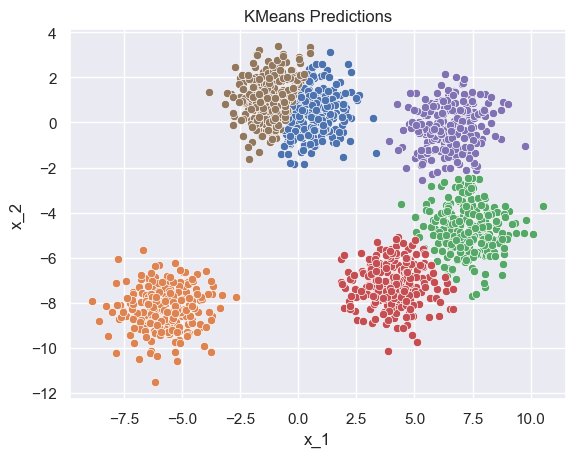

In [23]:
clusters = 6
X,y, true_centers = make_blobs(n_samples=1500, centers = clusters, cluster_std=1, random_state=seed, return_centers=True)
km = KMeans(n_clusters=clusters, random_state=seed)
classifications = km.fit_predict(X)
labels = set(classifications)
fig, ax = plt.subplots()
for label in labels:
    sns.scatterplot(x = X[classifications == label, 0], y = X[classifications == label, 1])

ax.set_title("KMeans Predictions")
ax.set_xlabel("x_1"); ax.set_ylabel("x_2")

Text(0, 0.5, 'x_2')

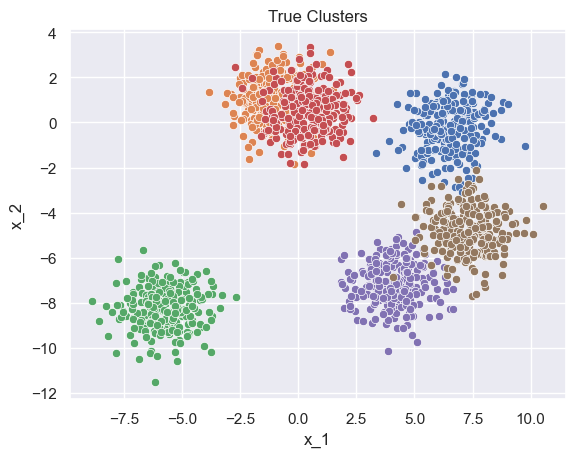

In [24]:
labels = set(y)
fig, ax = plt.subplots()
for label in labels:
    sns.scatterplot(x = X[y == label, 0], y = X[y == label, 1])

ax.set_title("True Clusters")
ax.set_xlabel("x_1"); ax.set_ylabel("x_2")

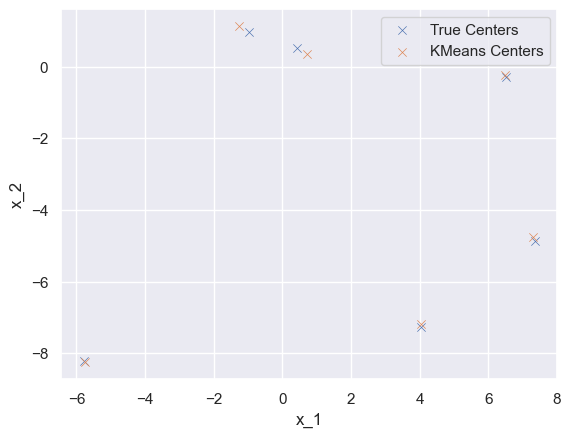

In [25]:
fig, ax = plt.subplots()
sns.scatterplot(x = true_centers[:, 0], y = true_centers[:, 1], label = "True Centers", marker='x' )
sns.scatterplot(x = km.cluster_centers_[:, 0], y = km.cluster_centers_[:, 1], label = "KMeans Centers",marker ='x')
ax.set_xlabel("x_1"); ax.set_ylabel("x_2")
ax.legend()

### PCA

Component 1 Angle: 24.133030041227975 deg


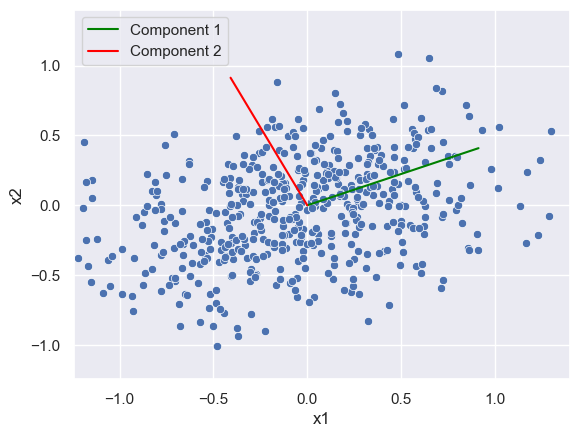

In [33]:
cov = get_cov(0.3, 0.1, 23)
X = np.random.multivariate_normal(mean = (0,0), cov = cov, size = 500)
fig, ax = plt.subplots()
sns.scatterplot(x = X[:,0], y = X[:, 1])
min, max = np.min(X)+0.1, np.max(X) +0.1
ax.set_xlim((min, max)) ; ax.set_ylim((min, max))

pca = PCA(n_components=2)
pca.fit(X)

colours = ['green', 'red']
for i, component in enumerate(pca.components_):
    coords = np.array([[0,0], 
                        component])
    sns.lineplot(x = coords[:, 0], y = coords[:, 1], c = colours[i], label = f'Component {i+1}')
ax.legend()
ax.set_xlabel("x1"); ax.set_ylabel("x2")

angle = np.rad2deg(np.arctan(pca.components_[0,1]/pca.components_[0,0]))
print (f"Component 1 Angle: {angle} deg")